In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# import the necessary packages
#from skimage.measure import structural_similarity as ssim
from skimage import measure
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
sup_path = 'drive/My Drive/CS168 Project/output_2x/1.bmp'
ori_path = 'drive/My Drive/CS168 Project/original/2.jpg'
low_path = 'drive/My Drive/CS168 Project/low res/1.jpg'

#sup_path = 'drive/My Drive/cs168/results/output_2x/12.bmp'
#low_path = 'drive/My Drive/cs168/results/output_2x/12.jpg'


original = cv2.imread(ori_path)
print(original.shape)
sup_res = cv2.imread(sup_path)
print(sup_res.shape)
low_res = cv2.imread(low_path)
print(low_res.shape)

(315, 236, 3)
(960, 756, 3)
(240, 189, 3)


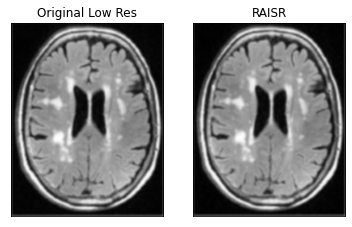

(240, 189, 3)
(960, 756, 3)


In [4]:
plt.subplot(121),plt.imshow(low_res),plt.title('Original Low Res')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sup_res),plt.title('RAISR')
plt.xticks([]), plt.yticks([])
plt.show()
print(low_res.shape)

print(sup_res.shape)

(300, 236, 3)
(300, 236, 3)
PSNR value is 32.96594846925804 dB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


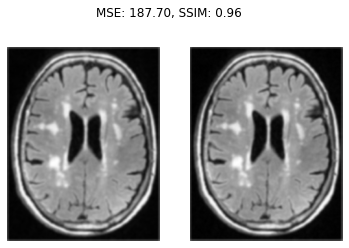

In [ ]:
from math import log10, sqrt 

def mse(imageA, imageB):
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])

	return err



def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	s = measure.compare_ssim(imageA, imageB, multichannel=True )
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
	plt.show()
 
 


def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
 

dim = (236, 300)
resized = cv2.resize(sup_res,dim,3)
print(resized.shape)
resized2 = cv2.resize(low_res,dim,3)
print(resized2.shape)
original = resized2 
compressed = resized
value = PSNR(original, compressed) 
print(f"PSNR value is {value} dB") 


                       

plt.show()
dim = (236, 300)
resized = cv2.resize(sup_res,dim,3)
resized2 = cv2.resize(low_res,dim,3)
compare_images(resized2, resized, "Original vs. Photoshopped")




